In [1]:
import torchreid

/home/nassimi/anaconda3/envs/test_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Dataset

In [5]:
datamanager = torchreid.data.ImageDataManager(
    root="reid-data",
    sources="market1501",
    targets="market1501",
    height=256,
    width=128,
    batch_size_train=32,
    batch_size_test=100,
    transforms=["random_flip", "random_crop"]
)

Building train transforms ...
+ resize to 256x128
+ random flip
+ random crop (enlarge to 288x144 and crop 256x128)
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
Building test transforms ...
+ resize to 256x128
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
=> Loading train (source) dataset
=> Loaded Market1501
  ----------------------------------------
  subset   | # ids | # images | # cameras
  ----------------------------------------
  train    |   751 |    12936 |         6
  query    |   750 |     3368 |         6
  gallery  |   751 |    15913 |         6
  ----------------------------------------
=> Loading test (target) dataset
=> Loaded Market1501
  ----------------------------------------
  subset   | # ids | # images | # cameras
  ----------------------------------------
  train    |   751 |    12936 |         6
  query    |   750 |     3368 |         6
  gal

# Define Model Based on Resnet50 and 715 Class Label

In [8]:
model = torchreid.models.build_model(
    name="resnet50",
    num_classes=datamanager.num_train_pids,
    loss="softmax",
    pretrained=True
)

model = model.cuda()

optimizer = torchreid.optim.build_optimizer(
    model,
    optim="adam",
    lr=0.0003
)

scheduler = torchreid.optim.build_lr_scheduler(
    optimizer,
    lr_scheduler="single_step",
    stepsize=20
)

# Defining Optimizer

In [9]:
engine = torchreid.engine.ImageSoftmaxEngine(
    datamanager,
    model,
    optimizer=optimizer,
    scheduler=scheduler,
    label_smooth=True
)

# Training Model for 60 Epochs

In [10]:
engine.run(
    save_dir="log/resnet50",
    max_epoch=60,
    eval_freq=10,
    print_freq=10,
    test_only=False
)

=> Start training
epoch: [1/60][10/404]	time 0.122 (2.907)	data 0.000 (0.068)	eta 19:33:57	loss 6.9991 (6.7472)	acc 0.0000 (1.2500)	lr 0.000300
epoch: [1/60][20/404]	time 0.124 (1.515)	data 0.000 (0.034)	eta 10:11:31	loss 6.6341 (6.8220)	acc 0.0000 (0.7812)	lr 0.000300
epoch: [1/60][30/404]	time 0.681 (1.121)	data 0.559 (0.093)	eta 7:32:11	loss 6.4631 (6.7619)	acc 0.0000 (0.6250)	lr 0.000300
epoch: [1/60][40/404]	time 0.629 (0.921)	data 0.508 (0.120)	eta 6:11:29	loss 6.6808 (6.7202)	acc 0.0000 (0.8594)	lr 0.000300
epoch: [1/60][50/404]	time 0.554 (0.806)	data 0.431 (0.141)	eta 5:25:08	loss 6.6569 (6.6995)	acc 0.0000 (0.8125)	lr 0.000300
epoch: [1/60][60/404]	time 0.224 (0.720)	data 0.102 (0.145)	eta 4:50:06	loss 6.5954 (6.6797)	acc 0.0000 (0.6771)	lr 0.000300
epoch: [1/60][70/404]	time 0.122 (0.636)	data 0.000 (0.126)	eta 4:16:11	loss 6.6471 (6.6706)	acc 0.0000 (0.6696)	lr 0.000300
epoch: [1/60][80/404]	time 0.122 (0.588)	data 0.000 (0.126)	eta 3:56:52	loss 6.3483 (6.6527)	acc 3.1250 (

epoch: [2/60][260/404]	time 0.122 (0.124)	data 0.000 (0.001)	eta 0:48:48	loss 4.5572 (4.9106)	acc 15.6250 (12.0312)	lr 0.000300
epoch: [2/60][270/404]	time 0.122 (0.124)	data 0.000 (0.001)	eta 0:48:45	loss 3.8534 (4.8903)	acc 31.2500 (12.3843)	lr 0.000300
epoch: [2/60][280/404]	time 0.122 (0.124)	data 0.000 (0.001)	eta 0:48:43	loss 4.1559 (4.8657)	acc 15.6250 (12.7232)	lr 0.000300
epoch: [2/60][290/404]	time 0.122 (0.124)	data 0.000 (0.001)	eta 0:48:40	loss 4.3043 (4.8463)	acc 15.6250 (13.0280)	lr 0.000300
epoch: [2/60][300/404]	time 0.122 (0.124)	data 0.000 (0.001)	eta 0:48:37	loss 4.3866 (4.8245)	acc 21.8750 (13.3646)	lr 0.000300
epoch: [2/60][310/404]	time 0.122 (0.124)	data 0.000 (0.001)	eta 0:48:35	loss 3.7804 (4.8026)	acc 37.5000 (13.6593)	lr 0.000300
epoch: [2/60][320/404]	time 0.122 (0.124)	data 0.000 (0.001)	eta 0:48:32	loss 4.2696 (4.7859)	acc 18.7500 (13.8574)	lr 0.000300
epoch: [2/60][330/404]	time 0.122 (0.124)	data 0.000 (0.001)	eta 0:48:30	loss 4.4221 (4.7654)	acc 15.625

epoch: [4/60][110/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:47:43	loss 2.6598 (2.5897)	acc 53.1250 (61.9318)	lr 0.000300
epoch: [4/60][120/404]	time 0.134 (0.125)	data 0.000 (0.001)	eta 0:47:43	loss 2.5152 (2.5889)	acc 62.5000 (61.8229)	lr 0.000300
epoch: [4/60][130/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:47:42	loss 2.4096 (2.5780)	acc 71.8750 (62.1394)	lr 0.000300
epoch: [4/60][140/404]	time 0.122 (0.125)	data 0.000 (0.001)	eta 0:47:42	loss 2.3434 (2.5704)	acc 71.8750 (62.3438)	lr 0.000300
epoch: [4/60][150/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:47:40	loss 2.5325 (2.5694)	acc 59.3750 (62.3333)	lr 0.000300
epoch: [4/60][160/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:47:36	loss 2.5657 (2.5735)	acc 65.6250 (62.1875)	lr 0.000300
epoch: [4/60][170/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:47:32	loss 2.6906 (2.5680)	acc 65.6250 (62.4632)	lr 0.000300
epoch: [4/60][180/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:47:28	loss 2.9087 (2.5663)	acc 59.375

epoch: [5/60][360/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:46:30	loss 1.9770 (2.1204)	acc 78.1250 (75.4427)	lr 0.000300
epoch: [5/60][370/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:46:28	loss 1.8561 (2.1199)	acc 81.2500 (75.4392)	lr 0.000300
epoch: [5/60][380/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:46:25	loss 1.9666 (2.1193)	acc 84.3750 (75.4523)	lr 0.000300
epoch: [5/60][390/404]	time 0.123 (0.125)	data 0.000 (0.000)	eta 0:46:22	loss 2.0587 (2.1170)	acc 71.8750 (75.5449)	lr 0.000300
epoch: [5/60][400/404]	time 0.122 (0.125)	data 0.000 (0.000)	eta 0:46:20	loss 2.2776 (2.1138)	acc 68.7500 (75.6328)	lr 0.000300
epoch: [6/60][10/404]	time 0.123 (0.135)	data 0.000 (0.012)	eta 0:49:56	loss 2.0100 (1.9091)	acc 71.8750 (81.2500)	lr 0.000300
epoch: [6/60][20/404]	time 0.123 (0.129)	data 0.000 (0.006)	eta 0:47:42	loss 1.9231 (1.9204)	acc 84.3750 (80.7812)	lr 0.000300
epoch: [6/60][30/404]	time 0.123 (0.127)	data 0.000 (0.004)	eta 0:46:57	loss 1.8194 (1.9029)	acc 84.3750 (

epoch: [7/60][210/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:45:07	loss 1.6397 (1.7579)	acc 87.5000 (85.8929)	lr 0.000300
epoch: [7/60][220/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:45:04	loss 1.7705 (1.7611)	acc 87.5000 (85.7528)	lr 0.000300
epoch: [7/60][230/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:45:00	loss 1.5565 (1.7628)	acc 96.8750 (85.6522)	lr 0.000300
epoch: [7/60][240/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:44:57	loss 1.7672 (1.7625)	acc 87.5000 (85.6641)	lr 0.000300
epoch: [7/60][250/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:44:54	loss 1.7408 (1.7614)	acc 87.5000 (85.6750)	lr 0.000300
epoch: [7/60][260/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:44:51	loss 1.7258 (1.7627)	acc 84.3750 (85.6010)	lr 0.000300
epoch: [7/60][270/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:44:48	loss 1.7031 (1.7642)	acc 87.5000 (85.6481)	lr 0.000300
epoch: [7/60][280/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:44:46	loss 1.7931 (1.7648)	acc 84.375

epoch: [9/60][60/404]	time 0.123 (0.125)	data 0.000 (0.002)	eta 0:43:48	loss 1.3546 (1.5509)	acc 96.8750 (91.5625)	lr 0.000300
epoch: [9/60][70/404]	time 0.123 (0.125)	data 0.000 (0.002)	eta 0:43:40	loss 1.6699 (1.5568)	acc 84.3750 (91.5625)	lr 0.000300
epoch: [9/60][80/404]	time 0.123 (0.125)	data 0.000 (0.002)	eta 0:43:33	loss 1.6080 (1.5583)	acc 87.5000 (91.4062)	lr 0.000300
epoch: [9/60][90/404]	time 0.123 (0.125)	data 0.000 (0.002)	eta 0:43:27	loss 1.4379 (1.5601)	acc 100.0000 (91.5625)	lr 0.000300
epoch: [9/60][100/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:43:22	loss 1.5788 (1.5602)	acc 90.6250 (91.6250)	lr 0.000300
epoch: [9/60][110/404]	time 0.134 (0.125)	data 0.000 (0.001)	eta 0:43:22	loss 1.3603 (1.5675)	acc 100.0000 (91.3636)	lr 0.000300
epoch: [9/60][120/404]	time 0.124 (0.125)	data 0.000 (0.001)	eta 0:43:30	loss 1.4889 (1.5671)	acc 96.8750 (91.4844)	lr 0.000300
epoch: [9/60][130/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:43:28	loss 1.6982 (1.5684)	acc 81.2500 

epoch: [10/60][300/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:42:06	loss 1.6035 (1.5393)	acc 84.3750 (91.4062)	lr 0.000300
epoch: [10/60][310/404]	time 0.131 (0.124)	data 0.000 (0.001)	eta 0:42:05	loss 1.4264 (1.5411)	acc 93.7500 (91.3810)	lr 0.000300
epoch: [10/60][320/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:42:05	loss 1.5526 (1.5422)	acc 90.6250 (91.2891)	lr 0.000300
epoch: [10/60][330/404]	time 0.125 (0.124)	data 0.000 (0.001)	eta 0:42:03	loss 1.5605 (1.5447)	acc 93.7500 (91.2784)	lr 0.000300
epoch: [10/60][340/404]	time 0.129 (0.124)	data 0.000 (0.001)	eta 0:42:01	loss 1.6632 (1.5445)	acc 93.7500 (91.3143)	lr 0.000300
epoch: [10/60][350/404]	time 0.123 (0.124)	data 0.000 (0.000)	eta 0:42:00	loss 1.5093 (1.5451)	acc 96.8750 (91.3125)	lr 0.000300
epoch: [10/60][360/404]	time 0.123 (0.124)	data 0.000 (0.000)	eta 0:41:59	loss 1.5086 (1.5447)	acc 87.5000 (91.3281)	lr 0.000300
epoch: [10/60][370/404]	time 0.124 (0.124)	data 0.000 (0.000)	eta 0:41:58	loss 1.4944 (1.5444)	ac

epoch: [12/60][110/404]	time 0.123 (0.126)	data 0.000 (0.001)	eta 0:41:20	loss 1.3271 (1.4580)	acc 100.0000 (94.3182)	lr 0.000300
epoch: [12/60][120/404]	time 0.123 (0.126)	data 0.000 (0.001)	eta 0:41:13	loss 1.4253 (1.4625)	acc 96.8750 (94.0885)	lr 0.000300
epoch: [12/60][130/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:41:07	loss 1.3529 (1.4615)	acc 96.8750 (94.0625)	lr 0.000300
epoch: [12/60][140/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:41:02	loss 1.4776 (1.4605)	acc 87.5000 (93.8839)	lr 0.000300
epoch: [12/60][150/404]	time 0.133 (0.125)	data 0.000 (0.001)	eta 0:41:04	loss 1.3560 (1.4623)	acc 93.7500 (93.8750)	lr 0.000300
epoch: [12/60][160/404]	time 0.134 (0.126)	data 0.000 (0.001)	eta 0:41:08	loss 1.4269 (1.4620)	acc 90.6250 (93.8281)	lr 0.000300
epoch: [12/60][170/404]	time 0.123 (0.126)	data 0.000 (0.001)	eta 0:41:09	loss 1.4568 (1.4628)	acc 90.6250 (93.8419)	lr 0.000300
epoch: [12/60][180/404]	time 0.134 (0.126)	data 0.000 (0.001)	eta 0:41:12	loss 1.4880 (1.4656)	a

epoch: [13/60][350/404]	time 0.129 (0.126)	data 0.000 (0.001)	eta 0:40:03	loss 1.5331 (1.4447)	acc 93.7500 (94.2589)	lr 0.000300
epoch: [13/60][360/404]	time 0.129 (0.126)	data 0.000 (0.001)	eta 0:40:03	loss 1.4804 (1.4453)	acc 93.7500 (94.2188)	lr 0.000300
epoch: [13/60][370/404]	time 0.134 (0.126)	data 0.000 (0.000)	eta 0:40:03	loss 1.4858 (1.4464)	acc 93.7500 (94.1807)	lr 0.000300
epoch: [13/60][380/404]	time 0.123 (0.126)	data 0.000 (0.000)	eta 0:40:01	loss 1.5399 (1.4473)	acc 87.5000 (94.1201)	lr 0.000300
epoch: [13/60][390/404]	time 0.123 (0.126)	data 0.000 (0.000)	eta 0:39:58	loss 1.4315 (1.4476)	acc 96.8750 (94.0865)	lr 0.000300
epoch: [13/60][400/404]	time 0.123 (0.126)	data 0.000 (0.000)	eta 0:39:55	loss 1.3914 (1.4484)	acc 93.7500 (94.0625)	lr 0.000300
epoch: [14/60][10/404]	time 0.129 (0.140)	data 0.000 (0.013)	eta 0:44:07	loss 1.2770 (1.3835)	acc 96.8750 (95.9375)	lr 0.000300
epoch: [14/60][20/404]	time 0.129 (0.134)	data 0.000 (0.006)	eta 0:42:24	loss 1.2965 (1.3911)	acc 

epoch: [15/60][190/404]	time 0.123 (0.128)	data 0.000 (0.001)	eta 0:39:18	loss 1.4117 (1.3896)	acc 87.5000 (95.3783)	lr 0.000300
epoch: [15/60][200/404]	time 0.123 (0.128)	data 0.000 (0.001)	eta 0:39:12	loss 1.4458 (1.3916)	acc 90.6250 (95.2812)	lr 0.000300
epoch: [15/60][210/404]	time 0.123 (0.128)	data 0.000 (0.001)	eta 0:39:06	loss 1.4130 (1.3932)	acc 93.7500 (95.2530)	lr 0.000300
epoch: [15/60][220/404]	time 0.123 (0.128)	data 0.000 (0.001)	eta 0:39:01	loss 1.4051 (1.3932)	acc 96.8750 (95.2699)	lr 0.000300
epoch: [15/60][230/404]	time 0.123 (0.127)	data 0.000 (0.001)	eta 0:38:56	loss 1.2913 (1.3928)	acc 100.0000 (95.2989)	lr 0.000300
epoch: [15/60][240/404]	time 0.123 (0.127)	data 0.000 (0.001)	eta 0:38:52	loss 1.3431 (1.3922)	acc 96.8750 (95.3125)	lr 0.000300
epoch: [15/60][250/404]	time 0.123 (0.127)	data 0.000 (0.001)	eta 0:38:47	loss 1.3436 (1.3909)	acc 100.0000 (95.3500)	lr 0.000300
epoch: [15/60][260/404]	time 0.123 (0.127)	data 0.000 (0.001)	eta 0:38:43	loss 1.4073 (1.3925)	

epoch: [17/60][30/404]	time 0.133 (0.138)	data 0.000 (0.005)	eta 0:40:44	loss 1.3843 (1.3436)	acc 96.8750 (96.8750)	lr 0.000300
epoch: [17/60][40/404]	time 0.133 (0.137)	data 0.000 (0.004)	eta 0:40:23	loss 1.3139 (1.3425)	acc 96.8750 (96.9531)	lr 0.000300
epoch: [17/60][50/404]	time 0.123 (0.135)	data 0.000 (0.003)	eta 0:39:50	loss 1.2945 (1.3398)	acc 96.8750 (96.8750)	lr 0.000300
epoch: [17/60][60/404]	time 0.123 (0.133)	data 0.000 (0.003)	eta 0:39:14	loss 1.3307 (1.3443)	acc 100.0000 (96.4583)	lr 0.000300
epoch: [17/60][70/404]	time 0.123 (0.131)	data 0.000 (0.002)	eta 0:38:47	loss 1.3159 (1.3449)	acc 93.7500 (96.3393)	lr 0.000300
epoch: [17/60][80/404]	time 0.123 (0.130)	data 0.000 (0.002)	eta 0:38:27	loss 1.3676 (1.3435)	acc 96.8750 (96.2109)	lr 0.000300
epoch: [17/60][90/404]	time 0.123 (0.130)	data 0.000 (0.002)	eta 0:38:11	loss 1.3065 (1.3435)	acc 96.8750 (96.1458)	lr 0.000300
epoch: [17/60][100/404]	time 0.123 (0.129)	data 0.000 (0.002)	eta 0:37:58	loss 1.2397 (1.3408)	acc 100.

epoch: [18/60][270/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:35:15	loss 1.3541 (1.3491)	acc 93.7500 (96.1806)	lr 0.000300
epoch: [18/60][280/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:35:14	loss 1.2934 (1.3500)	acc 100.0000 (96.1272)	lr 0.000300
epoch: [18/60][290/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:35:12	loss 1.2219 (1.3483)	acc 100.0000 (96.1961)	lr 0.000300
epoch: [18/60][300/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:35:10	loss 1.3912 (1.3477)	acc 93.7500 (96.1771)	lr 0.000300
epoch: [18/60][310/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:35:09	loss 1.3554 (1.3489)	acc 93.7500 (96.1593)	lr 0.000300
epoch: [18/60][320/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:35:08	loss 1.4925 (1.3489)	acc 90.6250 (96.1914)	lr 0.000300
epoch: [18/60][330/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:35:06	loss 1.4661 (1.3492)	acc 100.0000 (96.2121)	lr 0.000300
epoch: [18/60][340/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:35:05	loss 1.3242 (1.3496)

epoch: [20/60][110/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:34:06	loss 1.3172 (1.3107)	acc 90.6250 (97.1307)	lr 0.000300
epoch: [20/60][120/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:34:03	loss 1.4580 (1.3118)	acc 87.5000 (97.0573)	lr 0.000300
epoch: [20/60][130/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:34:00	loss 1.2628 (1.3127)	acc 100.0000 (97.0673)	lr 0.000300
epoch: [20/60][140/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:33:58	loss 1.2915 (1.3135)	acc 96.8750 (97.0982)	lr 0.000300
epoch: [20/60][150/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:33:56	loss 1.2547 (1.3133)	acc 96.8750 (97.0625)	lr 0.000300
epoch: [20/60][160/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:33:54	loss 1.2563 (1.3164)	acc 96.8750 (96.8945)	lr 0.000300
epoch: [20/60][170/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:33:52	loss 1.2861 (1.3158)	acc 96.8750 (96.9485)	lr 0.000300
epoch: [20/60][180/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:33:50	loss 1.4034 (1.3171)	a

epoch: [21/60][310/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:32:38	loss 1.1958 (1.1991)	acc 96.8750 (99.1331)	lr 0.000030
epoch: [21/60][320/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:32:36	loss 1.1885 (1.1985)	acc 100.0000 (99.1406)	lr 0.000030
epoch: [21/60][330/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:32:35	loss 1.1408 (1.1971)	acc 100.0000 (99.1572)	lr 0.000030
epoch: [21/60][340/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:32:34	loss 1.2126 (1.1964)	acc 100.0000 (99.1728)	lr 0.000030
epoch: [21/60][350/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:32:32	loss 1.1639 (1.1959)	acc 96.8750 (99.1607)	lr 0.000030
epoch: [21/60][360/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:32:31	loss 1.1301 (1.1948)	acc 100.0000 (99.1840)	lr 0.000030
epoch: [21/60][370/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:32:30	loss 1.1464 (1.1943)	acc 100.0000 (99.1807)	lr 0.000030
epoch: [21/60][380/404]	time 0.123 (0.123)	data 0.000 (0.000)	eta 0:32:28	loss 1.1386 (1.193

epoch: [23/60][150/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:31:27	loss 1.0952 (1.1378)	acc 100.0000 (99.7708)	lr 0.000030
epoch: [23/60][160/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:31:25	loss 1.2008 (1.1385)	acc 100.0000 (99.7852)	lr 0.000030
epoch: [23/60][170/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:31:23	loss 1.1180 (1.1387)	acc 100.0000 (99.7610)	lr 0.000030
epoch: [23/60][180/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:31:21	loss 1.1146 (1.1385)	acc 100.0000 (99.7569)	lr 0.000030
epoch: [23/60][190/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:31:19	loss 1.1569 (1.1383)	acc 100.0000 (99.7533)	lr 0.000030
epoch: [23/60][200/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:31:17	loss 1.1213 (1.1382)	acc 100.0000 (99.7656)	lr 0.000030
epoch: [23/60][210/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:31:16	loss 1.1314 (1.1393)	acc 96.8750 (99.7619)	lr 0.000030
epoch: [23/60][220/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:31:14	loss 1.1369 (1.13

epoch: [24/60][390/404]	time 0.123 (0.124)	data 0.000 (0.000)	eta 0:29:58	loss 1.1309 (1.1314)	acc 100.0000 (99.8317)	lr 0.000030
epoch: [24/60][400/404]	time 0.123 (0.124)	data 0.000 (0.000)	eta 0:29:57	loss 1.1390 (1.1317)	acc 100.0000 (99.8281)	lr 0.000030
epoch: [25/60][10/404]	time 0.123 (0.136)	data 0.000 (0.013)	eta 0:32:53	loss 1.1342 (1.1253)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [25/60][20/404]	time 0.123 (0.130)	data 0.000 (0.006)	eta 0:31:20	loss 1.1545 (1.1250)	acc 96.8750 (99.8438)	lr 0.000030
epoch: [25/60][30/404]	time 0.123 (0.127)	data 0.000 (0.004)	eta 0:30:49	loss 1.1249 (1.1245)	acc 100.0000 (99.8958)	lr 0.000030
epoch: [25/60][40/404]	time 0.123 (0.126)	data 0.000 (0.003)	eta 0:30:32	loss 1.1212 (1.1233)	acc 100.0000 (99.9219)	lr 0.000030
epoch: [25/60][50/404]	time 0.123 (0.126)	data 0.000 (0.003)	eta 0:30:22	loss 1.1401 (1.1248)	acc 100.0000 (99.9375)	lr 0.000030
epoch: [25/60][60/404]	time 0.123 (0.125)	data 0.000 (0.002)	eta 0:30:15	loss 1.1292 (1.1235)	a

epoch: [26/60][230/404]	time 0.126 (0.128)	data 0.000 (0.001)	eta 0:29:40	loss 1.1189 (1.1228)	acc 100.0000 (99.9049)	lr 0.000030
epoch: [26/60][240/404]	time 0.133 (0.128)	data 0.000 (0.001)	eta 0:29:37	loss 1.1326 (1.1228)	acc 100.0000 (99.9089)	lr 0.000030
epoch: [26/60][250/404]	time 0.126 (0.128)	data 0.000 (0.001)	eta 0:29:34	loss 1.1475 (1.1230)	acc 100.0000 (99.9125)	lr 0.000030
epoch: [26/60][260/404]	time 0.125 (0.128)	data 0.000 (0.001)	eta 0:29:31	loss 1.1420 (1.1229)	acc 100.0000 (99.9038)	lr 0.000030
epoch: [26/60][270/404]	time 0.132 (0.128)	data 0.000 (0.001)	eta 0:29:31	loss 1.0842 (1.1232)	acc 100.0000 (99.9074)	lr 0.000030
epoch: [26/60][280/404]	time 0.123 (0.128)	data 0.000 (0.001)	eta 0:29:29	loss 1.0992 (1.1232)	acc 100.0000 (99.9107)	lr 0.000030
epoch: [26/60][290/404]	time 0.132 (0.128)	data 0.000 (0.001)	eta 0:29:26	loss 1.1344 (1.1230)	acc 100.0000 (99.9138)	lr 0.000030
epoch: [26/60][300/404]	time 0.123 (0.127)	data 0.000 (0.001)	eta 0:29:23	loss 1.1172 (1.1

epoch: [28/60][70/404]	time 0.123 (0.125)	data 0.000 (0.002)	eta 0:27:40	loss 1.1290 (1.1102)	acc 100.0000 (99.9554)	lr 0.000030
epoch: [28/60][80/404]	time 0.123 (0.125)	data 0.000 (0.002)	eta 0:27:36	loss 1.1011 (1.1103)	acc 100.0000 (99.9219)	lr 0.000030
epoch: [28/60][90/404]	time 0.123 (0.125)	data 0.000 (0.002)	eta 0:27:32	loss 1.0857 (1.1108)	acc 100.0000 (99.8264)	lr 0.000030
epoch: [28/60][100/404]	time 0.125 (0.125)	data 0.001 (0.002)	eta 0:27:29	loss 1.1202 (1.1109)	acc 100.0000 (99.8438)	lr 0.000030
epoch: [28/60][110/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:27:26	loss 1.1027 (1.1117)	acc 100.0000 (99.8580)	lr 0.000030
epoch: [28/60][120/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:27:23	loss 1.0957 (1.1117)	acc 100.0000 (99.8698)	lr 0.000030
epoch: [28/60][130/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:27:21	loss 1.1132 (1.1122)	acc 100.0000 (99.8798)	lr 0.000030
epoch: [28/60][140/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:27:19	loss 1.1202 (1.1117

epoch: [29/60][310/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:26:00	loss 1.1302 (1.1162)	acc 100.0000 (99.8589)	lr 0.000030
epoch: [29/60][320/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:25:59	loss 1.1204 (1.1161)	acc 100.0000 (99.8633)	lr 0.000030
epoch: [29/60][330/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:25:57	loss 1.0928 (1.1159)	acc 100.0000 (99.8674)	lr 0.000030
epoch: [29/60][340/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:25:56	loss 1.1102 (1.1158)	acc 100.0000 (99.8713)	lr 0.000030
epoch: [29/60][350/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:25:54	loss 1.0963 (1.1156)	acc 100.0000 (99.8750)	lr 0.000030
epoch: [29/60][360/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:25:53	loss 1.1561 (1.1157)	acc 100.0000 (99.8785)	lr 0.000030
epoch: [29/60][370/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:25:52	loss 1.1444 (1.1156)	acc 100.0000 (99.8733)	lr 0.000030
epoch: [29/60][380/404]	time 0.126 (0.124)	data 0.000 (0.001)	eta 0:25:50	loss 1.1386 (1.1

epoch: [31/60][110/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:24:55	loss 1.1147 (1.1088)	acc 100.0000 (99.9148)	lr 0.000030
epoch: [31/60][120/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:24:53	loss 1.1120 (1.1093)	acc 100.0000 (99.8958)	lr 0.000030
epoch: [31/60][130/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:24:50	loss 1.0770 (1.1089)	acc 100.0000 (99.9038)	lr 0.000030
epoch: [31/60][140/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:24:48	loss 1.2389 (1.1092)	acc 96.8750 (99.8884)	lr 0.000030
epoch: [31/60][150/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:24:46	loss 1.1324 (1.1094)	acc 100.0000 (99.8958)	lr 0.000030
epoch: [31/60][160/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:24:44	loss 1.1621 (1.1094)	acc 100.0000 (99.9023)	lr 0.000030
epoch: [31/60][170/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:24:42	loss 1.1067 (1.1089)	acc 100.0000 (99.9081)	lr 0.000030
epoch: [31/60][180/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:24:40	loss 1.1344 (1.10

epoch: [32/60][350/404]	time 0.132 (0.124)	data 0.000 (0.000)	eta 0:23:26	loss 1.0809 (1.1079)	acc 100.0000 (99.9018)	lr 0.000030
epoch: [32/60][360/404]	time 0.124 (0.124)	data 0.000 (0.000)	eta 0:23:26	loss 1.1002 (1.1077)	acc 100.0000 (99.9045)	lr 0.000030
epoch: [32/60][370/404]	time 0.123 (0.124)	data 0.000 (0.000)	eta 0:23:25	loss 1.1369 (1.1081)	acc 100.0000 (99.9071)	lr 0.000030
epoch: [32/60][380/404]	time 0.123 (0.124)	data 0.000 (0.000)	eta 0:23:23	loss 1.1068 (1.1084)	acc 100.0000 (99.9013)	lr 0.000030
epoch: [32/60][390/404]	time 0.125 (0.124)	data 0.000 (0.000)	eta 0:23:23	loss 1.0931 (1.1085)	acc 100.0000 (99.9038)	lr 0.000030
epoch: [32/60][400/404]	time 0.129 (0.124)	data 0.000 (0.000)	eta 0:23:22	loss 1.1254 (1.1088)	acc 100.0000 (99.9062)	lr 0.000030
epoch: [33/60][10/404]	time 0.123 (0.137)	data 0.000 (0.013)	eta 0:25:49	loss 1.0962 (1.1029)	acc 100.0000 (99.6875)	lr 0.000030
epoch: [33/60][20/404]	time 0.123 (0.130)	data 0.000 (0.007)	eta 0:24:29	loss 1.0936 (1.102

epoch: [34/60][190/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:22:09	loss 1.0826 (1.1028)	acc 100.0000 (99.9507)	lr 0.000030
epoch: [34/60][200/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:22:07	loss 1.1009 (1.1030)	acc 100.0000 (99.9531)	lr 0.000030
epoch: [34/60][210/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:22:06	loss 1.1101 (1.1032)	acc 100.0000 (99.9554)	lr 0.000030
epoch: [34/60][220/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:22:04	loss 1.1065 (1.1027)	acc 100.0000 (99.9574)	lr 0.000030
epoch: [34/60][230/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:22:03	loss 1.0992 (1.1025)	acc 100.0000 (99.9592)	lr 0.000030
epoch: [34/60][240/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:22:01	loss 1.1150 (1.1027)	acc 100.0000 (99.9609)	lr 0.000030
epoch: [34/60][250/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:22:00	loss 1.1372 (1.1030)	acc 100.0000 (99.9625)	lr 0.000030
epoch: [34/60][260/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:21:58	loss 1.1374 (1.1

epoch: [36/60][20/404]	time 0.123 (0.130)	data 0.000 (0.007)	eta 0:21:46	loss 1.1190 (1.0986)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [36/60][30/404]	time 0.123 (0.127)	data 0.000 (0.005)	eta 0:21:22	loss 1.1093 (1.0975)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [36/60][40/404]	time 0.123 (0.126)	data 0.000 (0.004)	eta 0:21:09	loss 1.0880 (1.0949)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [36/60][50/404]	time 0.123 (0.126)	data 0.000 (0.003)	eta 0:21:01	loss 1.0969 (1.0949)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [36/60][60/404]	time 0.123 (0.125)	data 0.000 (0.002)	eta 0:20:56	loss 1.1505 (1.0960)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [36/60][70/404]	time 0.123 (0.125)	data 0.000 (0.002)	eta 0:20:51	loss 1.1142 (1.0970)	acc 100.0000 (99.9554)	lr 0.000030
epoch: [36/60][80/404]	time 0.123 (0.125)	data 0.000 (0.002)	eta 0:20:47	loss 1.0914 (1.0962)	acc 100.0000 (99.9219)	lr 0.000030
epoch: [36/60][90/404]	time 0.123 (0.124)	data 0.000 (0.002)	eta 0:20:44	loss 1.1014 (1.0960

epoch: [37/60][260/404]	time 0.123 (0.123)	data 0.000 (0.001)	eta 0:19:24	loss 1.1187 (1.0965)	acc 100.0000 (99.9760)	lr 0.000030
epoch: [37/60][270/404]	time 0.123 (0.123)	data 0.000 (0.001)	eta 0:19:23	loss 1.1099 (1.0966)	acc 100.0000 (99.9653)	lr 0.000030
epoch: [37/60][280/404]	time 0.123 (0.123)	data 0.000 (0.001)	eta 0:19:21	loss 1.1122 (1.0967)	acc 100.0000 (99.9665)	lr 0.000030
epoch: [37/60][290/404]	time 0.123 (0.123)	data 0.000 (0.001)	eta 0:19:20	loss 1.1135 (1.0967)	acc 100.0000 (99.9677)	lr 0.000030
epoch: [37/60][300/404]	time 0.123 (0.123)	data 0.000 (0.001)	eta 0:19:19	loss 1.0824 (1.0970)	acc 100.0000 (99.9688)	lr 0.000030
epoch: [37/60][310/404]	time 0.123 (0.123)	data 0.000 (0.001)	eta 0:19:17	loss 1.0832 (1.0972)	acc 100.0000 (99.9698)	lr 0.000030
epoch: [37/60][320/404]	time 0.123 (0.123)	data 0.000 (0.001)	eta 0:19:16	loss 1.1019 (1.0972)	acc 100.0000 (99.9707)	lr 0.000030
epoch: [37/60][330/404]	time 0.123 (0.123)	data 0.000 (0.001)	eta 0:19:15	loss 1.1264 (1.0

epoch: [39/60][90/404]	time 0.123 (0.124)	data 0.000 (0.002)	eta 0:18:14	loss 1.0915 (1.0896)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [39/60][100/404]	time 0.123 (0.124)	data 0.000 (0.002)	eta 0:18:12	loss 1.0715 (1.0890)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [39/60][110/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:18:09	loss 1.0817 (1.0884)	acc 100.0000 (100.0000)	lr 0.000030
epoch: [39/60][120/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:18:07	loss 1.0962 (1.0894)	acc 100.0000 (99.9740)	lr 0.000030
epoch: [39/60][130/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:18:05	loss 1.1195 (1.0903)	acc 100.0000 (99.9760)	lr 0.000030
epoch: [39/60][140/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:18:03	loss 1.0813 (1.0904)	acc 100.0000 (99.9777)	lr 0.000030
epoch: [39/60][150/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:18:02	loss 1.1533 (1.0909)	acc 100.0000 (99.9792)	lr 0.000030
epoch: [39/60][160/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:18:00	loss 1.0976 (1

epoch: [40/60][320/404]	time 0.123 (0.123)	data 0.000 (0.001)	eta 0:16:46	loss 1.0733 (1.0910)	acc 100.0000 (99.9707)	lr 0.000030
epoch: [40/60][330/404]	time 0.123 (0.123)	data 0.000 (0.001)	eta 0:16:44	loss 1.1041 (1.0913)	acc 100.0000 (99.9621)	lr 0.000030
epoch: [40/60][340/404]	time 0.133 (0.123)	data 0.000 (0.001)	eta 0:16:44	loss 1.1094 (1.0913)	acc 100.0000 (99.9632)	lr 0.000030
epoch: [40/60][350/404]	time 0.131 (0.123)	data 0.000 (0.001)	eta 0:16:44	loss 1.0835 (1.0914)	acc 100.0000 (99.9643)	lr 0.000030
epoch: [40/60][360/404]	time 0.123 (0.124)	data 0.000 (0.000)	eta 0:16:43	loss 1.0843 (1.0913)	acc 100.0000 (99.9653)	lr 0.000030
epoch: [40/60][370/404]	time 0.132 (0.124)	data 0.000 (0.000)	eta 0:16:43	loss 1.0743 (1.0915)	acc 100.0000 (99.9578)	lr 0.000030
epoch: [40/60][380/404]	time 0.134 (0.124)	data 0.000 (0.000)	eta 0:16:44	loss 1.0713 (1.0913)	acc 100.0000 (99.9589)	lr 0.000030
epoch: [40/60][390/404]	time 0.131 (0.124)	data 0.000 (0.000)	eta 0:16:44	loss 1.0811 (1.0

epoch: [42/60][120/404]	time 0.122 (0.124)	data 0.000 (0.001)	eta 0:15:36	loss 1.0635 (1.0808)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [42/60][130/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:15:34	loss 1.1108 (1.0808)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [42/60][140/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:15:33	loss 1.0690 (1.0811)	acc 100.0000 (99.9777)	lr 0.000003
epoch: [42/60][150/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:15:31	loss 1.0709 (1.0809)	acc 100.0000 (99.9792)	lr 0.000003
epoch: [42/60][160/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:15:29	loss 1.1506 (1.0815)	acc 100.0000 (99.9805)	lr 0.000003
epoch: [42/60][170/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:15:28	loss 1.0663 (1.0810)	acc 100.0000 (99.9816)	lr 0.000003
epoch: [42/60][180/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:15:26	loss 1.0736 (1.0810)	acc 100.0000 (99.9826)	lr 0.000003
epoch: [42/60][190/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:15:25	loss 1.0728 (1

epoch: [43/60][350/404]	time 0.123 (0.123)	data 0.000 (0.001)	eta 0:14:12	loss 1.0622 (1.0790)	acc 100.0000 (99.9732)	lr 0.000003
epoch: [43/60][360/404]	time 0.123 (0.123)	data 0.000 (0.000)	eta 0:14:11	loss 1.0821 (1.0789)	acc 100.0000 (99.9740)	lr 0.000003
epoch: [43/60][370/404]	time 0.123 (0.123)	data 0.000 (0.000)	eta 0:14:10	loss 1.0937 (1.0792)	acc 100.0000 (99.9747)	lr 0.000003
epoch: [43/60][380/404]	time 0.123 (0.123)	data 0.000 (0.000)	eta 0:14:09	loss 1.1037 (1.0792)	acc 100.0000 (99.9753)	lr 0.000003
epoch: [43/60][390/404]	time 0.123 (0.123)	data 0.000 (0.000)	eta 0:14:07	loss 1.0790 (1.0793)	acc 100.0000 (99.9760)	lr 0.000003
epoch: [43/60][400/404]	time 0.122 (0.123)	data 0.000 (0.000)	eta 0:14:06	loss 1.0647 (1.0793)	acc 100.0000 (99.9766)	lr 0.000003
epoch: [44/60][10/404]	time 0.123 (0.136)	data 0.000 (0.013)	eta 0:15:32	loss 1.1084 (1.0811)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [44/60][20/404]	time 0.123 (0.129)	data 0.000 (0.007)	eta 0:14:45	loss 1.0720 (1.07

epoch: [45/60][180/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:12:59	loss 1.0726 (1.0776)	acc 100.0000 (99.9826)	lr 0.000003
epoch: [45/60][190/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:12:57	loss 1.0688 (1.0774)	acc 100.0000 (99.9836)	lr 0.000003
epoch: [45/60][200/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:12:56	loss 1.0670 (1.0771)	acc 100.0000 (99.9844)	lr 0.000003
epoch: [45/60][210/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:12:54	loss 1.0717 (1.0768)	acc 100.0000 (99.9851)	lr 0.000003
epoch: [45/60][220/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:12:53	loss 1.0917 (1.0769)	acc 100.0000 (99.9858)	lr 0.000003
epoch: [45/60][230/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:12:51	loss 1.0733 (1.0771)	acc 100.0000 (99.9864)	lr 0.000003
epoch: [45/60][240/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:12:50	loss 1.0657 (1.0772)	acc 100.0000 (99.9870)	lr 0.000003
epoch: [45/60][250/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:12:49	loss 1.0717 (1.0

epoch: [47/60][20/404]	time 0.123 (0.130)	data 0.000 (0.007)	eta 0:12:12	loss 1.0696 (1.0814)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [47/60][30/404]	time 0.124 (0.128)	data 0.001 (0.005)	eta 0:11:58	loss 1.0739 (1.0786)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [47/60][40/404]	time 0.123 (0.127)	data 0.000 (0.004)	eta 0:11:51	loss 1.0708 (1.0788)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [47/60][50/404]	time 0.123 (0.126)	data 0.000 (0.003)	eta 0:11:46	loss 1.0755 (1.0776)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [47/60][60/404]	time 0.123 (0.125)	data 0.000 (0.002)	eta 0:11:42	loss 1.0843 (1.0771)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [47/60][70/404]	time 0.123 (0.125)	data 0.000 (0.002)	eta 0:11:39	loss 1.1104 (1.0766)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [47/60][80/404]	time 0.123 (0.125)	data 0.000 (0.002)	eta 0:11:36	loss 1.0634 (1.0773)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [47/60][90/404]	time 0.123 (0.125)	data 0.000 (0.002)	eta 0:11:34	loss 1.1011 (1.07

epoch: [48/60][250/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:10:19	loss 1.0602 (1.0784)	acc 100.0000 (99.9875)	lr 0.000003
epoch: [48/60][260/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:10:17	loss 1.0770 (1.0784)	acc 100.0000 (99.9880)	lr 0.000003
epoch: [48/60][270/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:10:16	loss 1.0918 (1.0785)	acc 100.0000 (99.9884)	lr 0.000003
epoch: [48/60][280/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:10:15	loss 1.0722 (1.0784)	acc 100.0000 (99.9888)	lr 0.000003
epoch: [48/60][290/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:10:13	loss 1.0710 (1.0785)	acc 100.0000 (99.9892)	lr 0.000003
epoch: [48/60][300/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:10:12	loss 1.1138 (1.0786)	acc 100.0000 (99.9896)	lr 0.000003
epoch: [48/60][310/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:10:11	loss 1.0908 (1.0783)	acc 100.0000 (99.9899)	lr 0.000003
epoch: [48/60][320/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:10:10	loss 1.0895 (1.0

epoch: [50/60][80/404]	time 0.124 (0.125)	data 0.000 (0.002)	eta 0:09:05	loss 1.1021 (1.0748)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [50/60][90/404]	time 0.123 (0.125)	data 0.000 (0.002)	eta 0:09:03	loss 1.0871 (1.0750)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [50/60][100/404]	time 0.123 (0.125)	data 0.000 (0.002)	eta 0:09:01	loss 1.0773 (1.0759)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [50/60][110/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:08:59	loss 1.1109 (1.0765)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [50/60][120/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:08:58	loss 1.0698 (1.0769)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [50/60][130/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:08:56	loss 1.0831 (1.0769)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [50/60][140/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:08:54	loss 1.0604 (1.0769)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [50/60][150/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:08:53	loss 1.0661

epoch: [51/60][280/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:07:44	loss 1.0692 (1.0762)	acc 100.0000 (99.9888)	lr 0.000003
epoch: [51/60][290/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:07:43	loss 1.0821 (1.0763)	acc 100.0000 (99.9892)	lr 0.000003
epoch: [51/60][300/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:07:42	loss 1.0825 (1.0763)	acc 100.0000 (99.9896)	lr 0.000003
epoch: [51/60][310/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:07:41	loss 1.0867 (1.0761)	acc 100.0000 (99.9899)	lr 0.000003
epoch: [51/60][320/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:07:39	loss 1.0678 (1.0763)	acc 100.0000 (99.9902)	lr 0.000003
epoch: [51/60][330/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:07:38	loss 1.0680 (1.0762)	acc 100.0000 (99.9905)	lr 0.000003
epoch: [51/60][340/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:07:37	loss 1.0821 (1.0763)	acc 100.0000 (99.9908)	lr 0.000003
epoch: [51/60][350/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:07:36	loss 1.0573 (1.0

epoch: [53/60][120/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:06:26	loss 1.0755 (1.0761)	acc 100.0000 (99.9740)	lr 0.000003
epoch: [53/60][130/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:06:24	loss 1.0592 (1.0759)	acc 100.0000 (99.9760)	lr 0.000003
epoch: [53/60][140/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:06:23	loss 1.0897 (1.0760)	acc 100.0000 (99.9777)	lr 0.000003
epoch: [53/60][150/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:06:21	loss 1.0734 (1.0758)	acc 100.0000 (99.9792)	lr 0.000003
epoch: [53/60][160/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:06:20	loss 1.0731 (1.0762)	acc 100.0000 (99.9805)	lr 0.000003
epoch: [53/60][170/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:06:18	loss 1.0831 (1.0764)	acc 100.0000 (99.9816)	lr 0.000003
epoch: [53/60][180/404]	time 0.124 (0.124)	data 0.000 (0.001)	eta 0:06:17	loss 1.0662 (1.0761)	acc 100.0000 (99.9826)	lr 0.000003
epoch: [53/60][190/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:06:16	loss 1.0695 (1.0

epoch: [54/60][360/404]	time 0.127 (0.124)	data 0.000 (0.000)	eta 0:05:05	loss 1.0652 (1.0757)	acc 100.0000 (99.9913)	lr 0.000003
epoch: [54/60][370/404]	time 0.132 (0.124)	data 0.000 (0.000)	eta 0:05:04	loss 1.0680 (1.0757)	acc 100.0000 (99.9916)	lr 0.000003
epoch: [54/60][380/404]	time 0.123 (0.124)	data 0.000 (0.000)	eta 0:05:03	loss 1.0562 (1.0758)	acc 100.0000 (99.9918)	lr 0.000003
epoch: [54/60][390/404]	time 0.123 (0.124)	data 0.000 (0.000)	eta 0:05:02	loss 1.0661 (1.0758)	acc 100.0000 (99.9920)	lr 0.000003
epoch: [54/60][400/404]	time 0.123 (0.124)	data 0.000 (0.000)	eta 0:05:00	loss 1.0770 (1.0762)	acc 100.0000 (99.9922)	lr 0.000003
epoch: [55/60][10/404]	time 0.123 (0.136)	data 0.000 (0.013)	eta 0:05:29	loss 1.0634 (1.0684)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [55/60][20/404]	time 0.123 (0.130)	data 0.000 (0.007)	eta 0:05:12	loss 1.0640 (1.0707)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [55/60][30/404]	time 0.123 (0.128)	data 0.000 (0.005)	eta 0:05:05	loss 1.0672 (1.07

epoch: [56/60][190/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:03:46	loss 1.0947 (1.0772)	acc 100.0000 (99.9836)	lr 0.000003
epoch: [56/60][200/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:03:45	loss 1.0671 (1.0771)	acc 100.0000 (99.9844)	lr 0.000003
epoch: [56/60][210/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:03:44	loss 1.0580 (1.0769)	acc 100.0000 (99.9851)	lr 0.000003
epoch: [56/60][220/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:03:42	loss 1.0821 (1.0769)	acc 100.0000 (99.9858)	lr 0.000003
epoch: [56/60][230/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:03:41	loss 1.0556 (1.0768)	acc 100.0000 (99.9864)	lr 0.000003
epoch: [56/60][240/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:03:40	loss 1.0554 (1.0767)	acc 100.0000 (99.9870)	lr 0.000003
epoch: [56/60][250/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:03:39	loss 1.0619 (1.0765)	acc 100.0000 (99.9875)	lr 0.000003
epoch: [56/60][260/404]	time 0.123 (0.124)	data 0.000 (0.001)	eta 0:03:37	loss 1.0770 (1.0

epoch: [58/60][20/404]	time 0.123 (0.130)	data 0.000 (0.007)	eta 0:02:35	loss 1.0714 (1.0780)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [58/60][30/404]	time 0.123 (0.128)	data 0.000 (0.005)	eta 0:02:31	loss 1.0543 (1.0764)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [58/60][40/404]	time 0.123 (0.127)	data 0.000 (0.003)	eta 0:02:28	loss 1.0761 (1.0758)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [58/60][50/404]	time 0.123 (0.126)	data 0.000 (0.003)	eta 0:02:26	loss 1.0605 (1.0747)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [58/60][60/404]	time 0.123 (0.126)	data 0.000 (0.002)	eta 0:02:24	loss 1.0703 (1.0746)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [58/60][70/404]	time 0.123 (0.125)	data 0.000 (0.002)	eta 0:02:23	loss 1.0839 (1.0749)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [58/60][80/404]	time 0.123 (0.125)	data 0.000 (0.002)	eta 0:02:21	loss 1.0716 (1.0743)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [58/60][90/404]	time 0.123 (0.125)	data 0.000 (0.002)	eta 0:02:20	loss 1.0751 (1.07

epoch: [59/60][250/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:01:09	loss 1.0993 (1.0748)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [59/60][260/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:01:08	loss 1.0626 (1.0748)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [59/60][270/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:01:07	loss 1.0923 (1.0751)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [59/60][280/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:01:05	loss 1.0689 (1.0751)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [59/60][290/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:01:04	loss 1.0575 (1.0752)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [59/60][300/404]	time 0.124 (0.125)	data 0.000 (0.001)	eta 0:01:03	loss 1.0701 (1.0755)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [59/60][310/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:01:02	loss 1.0805 (1.0754)	acc 100.0000 (100.0000)	lr 0.000003
epoch: [59/60][320/404]	time 0.123 (0.125)	data 0.000 (0.001)	eta 0:01:00	loss 1.09

# Test Model

## Define Model 

In [18]:
model_2 = torchreid.models.build_model(
    name="resnet50",
    num_classes=datamanager.num_train_pids,
    loss="softmax",
    pretrained=True
)

model_2 = model_2.cuda()

## Adding PreTrained Weights to Model

In [69]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

checkpoint = torch.load('model.pth.tar-60')
model_2.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [45]:
checkpoint

{'state_dict': OrderedDict([('conv1.weight',
               tensor([[[[ 5.6611e-03,  1.2831e-02, -6.1926e-03,  ..., -2.4312e-02,
                          -2.3895e-02, -4.1526e-02],
                         [-1.8758e-03,  3.4047e-03,  1.1356e-02,  ...,  2.2634e-03,
                          -1.2012e-02, -2.0368e-02],
                         [ 4.2394e-03,  7.0460e-03,  2.0327e-03,  ...,  6.3402e-02,
                           3.6728e-02,  3.3470e-02],
                         ...,
                         [-6.4512e-03,  1.3656e-02, -1.3289e-02,  ..., -9.6423e-02,
                          -6.1733e-02, -2.3963e-03],
                         [ 3.7796e-03,  3.4324e-02,  4.2114e-02,  ...,  1.1785e-02,
                          -2.7134e-02, -1.3169e-02],
                         [-4.4216e-02, -9.6844e-03, -1.5981e-03,  ...,  3.2261e-02,
                           2.5255e-02,  1.1243e-02]],
               
                        [[-1.0030e-02,  1.6712e-02,  2.8126e-02,  ...,  4.8045e-02,
  

# Data PreProcess

In [21]:
import cv2
import torchvision.transforms as transforms

In [87]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    transforms.Resize((256,128))
])
model_2.eval()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


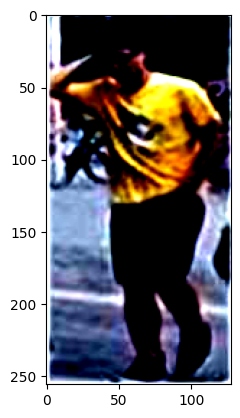

In [98]:
img1 = cv2.imread('Screenshot from 2022-12-05 18-23-11.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img1 = transform(img1)

img2 = cv2.imread('Screenshot from 2022-12-05 18-23-25.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img2 = transform(img2)

img3 = cv2.imread('Screenshot from 2022-12-05 18-27-29.png')
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
img3 = transform(img3)

plt.imshow(img1.permute(1,2,0))

In [91]:
x1 = model_2(img1.unsqueeze(0).float().cuda())
x2 = model_2(img2.unsqueeze(0).float().cuda())
x3 = model_2(img3.unsqueeze(0).float().cuda())

# 2 Similar Data 

In [96]:
torch.cdist(x1, x2, p=2.0).detach().cpu()[0][0]

tensor(9.8119)

# 2 Different Data 

In [93]:
torch.cdist(x1, x3, p=2.0).detach().cpu()[0][0]

tensor(24.3122)

# 2 Different Data 

In [94]:
torch.cdist(x2, x3, p=2.0).detach().cpu()[0][0]

tensor(25.7515)